Source: https://worldhappiness.report/ed/2021/

For details on the Life Ladder (i.e. happiness score) and how it is calculated see https://worldhappiness.report/faq/#what-is-the-original-source-of-the-data-for-figure-21-how-are-the-rankings-calculated

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
whr = pd.read_csv('./data/world_happiness_report.csv')

In [3]:
whr.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


Filter out everything but the most recent year for which there is data.

I also drop any rows with missing values as these cause problems when plotting the data in d3.

In [9]:
whr20 = whr[whr.year == 2020]
whr20 = whr20[['Life Ladder', 'Log GDP per capita', 'Healthy life expectancy at birth']].dropna()
whr20.columns = ['LifeLadder', 'LogGDPPerCap', 'LifeExp']
whr20.head()

,LifeLadder,LogGDPPerCap,LifeExp
24,5.365,9.497,69.3
51,5.901,9.850,69.2
79,7.137,10.760,74.2
92,7.213,10.851,73.6
117,6.173,10.620,69.7


Let's have a quick look at how this might look in a bubble plot:

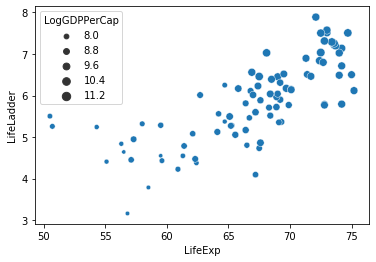

In [10]:
sns.scatterplot(data=whr20, x='LifeExp', y='LifeLadder', size='LogGDPPerCap')
plt.show()

Finally, let's save the data:

In [6]:
whr20.to_csv('./data/world_happiness_2020.csv', index=False)